# Markov Clustering Algorithm

###### Motahare Mounesan

The algorithm : 

In [249]:
#   G is a graph
#   add loops to G                             # see below
#   set Γ to some value                        # affects granularity
#   set M_1 to be the matrix of random walks on G

#   while (change) {
#      M_2 =  M_1 * M_1                        #  expansion  
#      M_1 =  Γ(M_2)                           #  inflation
#      change   =  difference(M_1, M_2)
#   }

##### 1. Input the Undirected Graph

In [250]:
# A 
Matrix = [[0,1,1,1],
         [1,0,0,1],
         [1,0,0,0],
        [1,1,0,0]]

In [251]:
size = len(Matrix)

##### 2. Add Self Loops

In [252]:
def addSelfLoop(Matrix):
    size = len(Matrix)
    for i in range(size):
        Matrix[i][i] = 1
    return Matrix

##### 3. Create associated Markov Chain Transition Matrix

In [253]:
def createTransition(Matrix):
    size = len(Matrix)
    Transition = [[0 for i in range(size)] for j in range(size)]
    for j in range(size):
        sum = 0
        for i in range(size):
            sum += Matrix[i][j]
        for i in range(size):
            Transition[i][j] = round(Matrix[i][j]/sum, 2)
    return Transition

##### 4. Expand by taking the e_th power of the matrix

In [254]:
def expand(Transition):
    size = len(Transition)
    Expansion = [[0 for i in range(size)] for j in range(size)]
    for i in range(size):
        for j in range(size):
            sum = 0
            for k in range(size):
                sum += Transition[i][k] * Transition[k][j]
            Expansion[i][j] = round(sum,2)
    return Expansion

##### 5. Inflate by taking inflation of the resulting matrix with parameter r

In [255]:
def inflate(Expansion, power):
    size = len(Expansion)
    Inflation = [[0 for i in range(size)] for j in range(size)]
    for i in range(size):
        for j in range(size):
            Inflation[i][j] = math.pow(Expansion[i][j],power)

    for j in range(size):
        sum = 0
        for i in range(size):
            sum += Inflation[i][j]
        for i in range(size):
            Inflation[i][j] = round(Inflation[i][j]/sum, 2)
    return Inflation

In [256]:
import math
def change(Matrix1, Matrix2):
    size = len(Matrix1)
    change = 0
    for i in range(size):
        for j in range(size):
            if(math.fabs(Matrix1[i][j]-Matrix2[i][j]) > change):
                change = math.fabs(Matrix1[i][j]-Matrix2[i][j])
    return change

In [263]:
def MCL(Matrix):
    
    Matrix = addSelfLoop(Matrix)
    print (pd.DataFrame(Matrix))
    Gamma = 2
    Transition = createTransition(Matrix)
    M1 = Transition
    print ("Transition")
    print (pd.DataFrame(M1))
    
    counter =1
    epsilon = 0.001
    change_ = float("inf")
    while (change_ > epsilon):
        print("Iterate :: ", counter,":::::::::::::::::::::::::::::")
        counter += 1
        # M_2 =  M_1 * M_1  #  expansion  
        M2 = expand(M1)
        print ("expanded\n",pd.DataFrame(M2))
        # M_1 =  Γ(M_2)     #  inflation
        M1 = inflate(M2, 2)
        print ("inflated\n",pd.DataFrame(M1))
        # change   =  difference(M_1, M_2)
        change_ = change(M1,M2)
    return M1

# =====================================================================

Here is the input matrix which we are going to run the algorihtm on:

In [264]:
#          0  1  2  3  4  5  6  7  
Matrix = [[0, 1, 0, 1, 0, 0, 0, 0], #0
          [1, 0, 1, 1, 0, 1, 0, 0], #1
          [0, 1, 0, 1, 1, 0, 0, 0], #2
          [1, 1, 1, 0, 0, 0, 0, 0], #3
          [0, 0, 1, 0, 0, 1, 1, 1], #4
          [0, 1, 0, 0, 1, 0, 1, 0], #5
          [0, 0, 0, 0, 1, 1, 0, 1], #6
          [0, 0, 0, 0, 1, 0, 1, 0]] #7

And the representation of matrix:

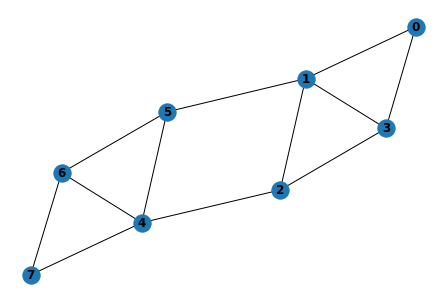

In [265]:
import networkx as nx
import matplotlib.pyplot as plt
my_graph = nx.Graph() 
my_graph.add_edges_from([
                        (0,1),
                        (0,3),
                        (1,2),
                        (1,3),
                        (1,5),
                        (2,3),
                        (2,4),
                        (4,5),
                        (4,6),
                        (4,7),
                        (5,6),
                        (6,7)])
nx.draw(my_graph, with_labels=True, font_weight='bold')

Applyin the algorithm:

In [266]:
MCL(Matrix)

   0  1  2  3  4  5  6  7
0  1  1  0  1  0  0  0  0
1  1  1  1  1  0  1  0  0
2  0  1  1  1  1  0  0  0
3  1  1  1  1  0  0  0  0
4  0  0  1  0  1  1  1  1
5  0  1  0  0  1  1  1  0
6  0  0  0  0  1  1  1  1
7  0  0  0  0  1  0  1  1
Transition
      0    1     2     3    4     5     6     7
0  0.33  0.2  0.00  0.25  0.0  0.00  0.00  0.00
1  0.33  0.2  0.25  0.25  0.0  0.25  0.00  0.00
2  0.00  0.2  0.25  0.25  0.2  0.00  0.00  0.00
3  0.33  0.2  0.25  0.25  0.0  0.00  0.00  0.00
4  0.00  0.0  0.25  0.00  0.2  0.25  0.25  0.33
5  0.00  0.2  0.00  0.00  0.2  0.25  0.25  0.00
6  0.00  0.0  0.00  0.00  0.2  0.25  0.25  0.33
7  0.00  0.0  0.00  0.00  0.2  0.00  0.25  0.33
Iterate ::  1 :::::::::::::::::::::::::::::
expanded
       0     1     2     3     4     5     6     7
0  0.26  0.16  0.11  0.20  0.00  0.05  0.00  0.00
1  0.26  0.26  0.17  0.26  0.10  0.11  0.06  0.00
2  0.15  0.14  0.22  0.17  0.09  0.10  0.05  0.07
3  0.26  0.21  0.17  0.26  0.05  0.05  0.00  0.00
4  0.00  0.10  0.11

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

Algorithm converged after 7 steps, and the clusters are as follows:
    {0,1,2,3}
    {4,5,6,7}

I also run it with the python library to make sure the results are true:

In [268]:
import markov_clustering as mc
import numpy as np
result = mc.run_mcl(np.array(Matrix))  
result

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])